### Marcos Hernandez

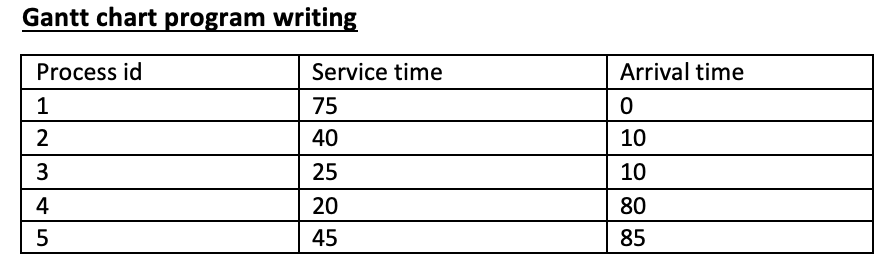

Write a computer program simulating RR scheduling for the 5 processes with arrival and service times as shown in the table above. Your program will show the progress of each process and calculate start time, end time, initial wait time, total wait time of each process. Consider two cases: 

Process id	Service time	Arrival time
1	        75	            0
2	        40	            10
3	        25	            10
4	        20	            80
5           45	            85

>Case 1: Quantum =10, context switch =0

>Case 2: Quantum =10, context switch =2

Before you start coding think critically and write clearly:<br>
•	What are the inputs of your program?<br>
•	How you will design the modules of your program.. etc


### Deliverables:  
1. your well documented source code in a word file on BB.

2. submit in class a screen shot of the output as it runs. Your output will show start time, end time, initial wait time, total wait time, turnaround time of each process in a table. One row for one process. You will have one such table with context switch 0. 

3. You will also need to demonstrate your code to me 


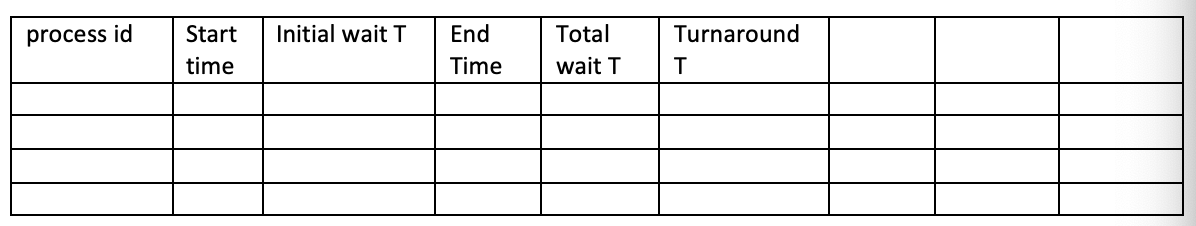

In [28]:
def generate_rand_arrival_times(num_arrivals=99, min_time=4, max_time=9):# modified to return 2 arrays inter_arrival_times[] and arrival_times[]
    import random
    import numpy as np
    arrivals = []
    arrivals.append(0)
    random.seed(5)
    for i in range(num_arrivals):
        rand_int= random.randint(min_time-1, max_time)
        arrivals.append(rand_int)
    inter_arrival_times = np.array(arrivals)
    #print("Inter Arrival Times:",np.array(inter_arrival_times),"\nInter Arrival Times:",len(inter_arrival_times))
    #arrival_times = np.cumsum(inter_arrival_times) #cumulative sum is a simple alternative
    arrival_times = []
    sum=0
    for i in inter_arrival_times:
        sum+=i
        arrival_times.append(sum)
    arrival_times = np.array(arrival_times)
    #print("\nArrival Times:",arrival_times,"\nArrival Times size:",len(arrival_times))
    return inter_arrival_times ,arrival_times

In [29]:
def generate_service_times(num_service_times=100, min_time=2, max_time=5): #updated to return a service times array
    import random
    import numpy as np

    service_times = []
    random.seed(5)
    for i in range(num_service_times):
        rand_int= random.randint(min_time, max_time)
        service_times.append(rand_int)
    service_times = np.array(service_times)
    #print("Service Times:",service_times)
    #print("Service Times size:",len(service_times))
    return service_times

In [ ]:
quantum= 10
context_switch= 0 
clk=0 #clk initialized

#Gantt initialized()
ready_queue=[]
service_queue=[]
# process id = index +1


result = generate_rand_arrival_times(100,2,5) #generating and unpacking inter arrival times and arrival times
inter_arrival_times =result[0]
arrival_times =result[1]

original_service_times= generate_service_times(100,2,5) # generating service times

service_left= original_service_times #creating a copy of service times to trak updated service times after each quantum

#queueing ready_queue to service_queue
#TODO: and a complete flag to indicate all processes are complete
for i in arrival_times:
    if arrival_times[i] <= time:
        
        #Servicing service queue
        while len(service_queue)>0:
            for i in service_queue:
                if quantum < service_left[i]:        #service time bigger than quantum case, process_update, time+= quantum, move to back, next process
                    time+= quantum
                    # service process
                    service_left=- quantum
                    # move all list items to the backs of the array
                    # next
                elif quantum == service_left[i]:    #service completes within exact quantum time, process_update, time += quantum, remove process, next process
                    time+= quantum
                    #remove process[i] from queue
                    #next
                    
                else:                               # service finishes before the quantum is completed, process_update, time += service_left[i], remove process, next process
                    time+= service_left[i]
                    #remove process from queue
                    #next

0


In [35]:
time=0

ganntt_chart = []


ganntt_chart.append(["time1", "curr process1", "complete"])
ganntt_chart.append(["time2", "curr process2","incomplete- time left, quantums left"])

for i in ganntt_chart:
    print(f"Time: {i[0]},    process: {i[1]},     status:{i[2]}")



Time: time1,    process: curr process1,     status:complete
Time: time2,    process: curr process2,     status:incomplete- time left, quantums left


In [ ]:
##Initiazlized variables
processes_to_generate= 100
quantum=10
context_switch=0

p_count= 0
q_count=0

## Generate random arrival and service times
result = generate_rand_arrival_times(99,4,9) #generating and unpacking: 
inter_arrival_times = result[0]                #inter arrival times and
arrival_times = result[1]                      #arrival times
original_service_times = generate_service_times(100,2,5) # generating service times

##creating a df 
import pandas as pd
process_df= pd.DataFrame(columns=["Process ID", "Inter Arrival T", "Arrival T", "Service T", "Service T Left", "End T", "Turn Arround T", "Total wait T", "Initial Wait T","Start T", "Status"])

process_df["Process ID"] = list(range(1,1+processes_to_generate))
process_df["Inter Arrival T"] = inter_arrival_times
process_df["Arrival T"] = arrival_times
process_df["Service T"]= original_service_times
process_df["Service T Left"] = original_service_times
process_df["Status"] = "Has not arrived"
process_df

#Need to calculate : End T, Turn Around T(If finished: End_T - Arr_Time), Total Wait T(If finished: (Turn Arr T)- (last Service_Left + Quantum*q_count) or "Turn Arround T" - "Service T" ), Start T(if start time == nan, start time== curr time), Initial Wait T(Start - arrival time), Update Status periodically(after each quantum)

##Initializing Queues
ready_queue=[] #processes that have arrived and to be appended to the service queue at the start of each new RR cycle
service_queue=[] # processes to be served once per rr cycle until each is complete

time = 0 # start time is 0 and will be updated by the quantum unless a process ends before the quantum period

#TODO: turn into a function
# check if any process arrival times are smaller than or equal to current time, if so add that processe's ID to the ready queue
##Updating ready queue
for index, row in process_df.iterrows():
    if row["Arrival T"] <= time:
        ready_queue.append(row["Process ID"]) # Adds processes IDs of processes that have arrived to the ready queue
        service= ready_queue.pop()
        service_queue.append(service)
        row["Status"] = "Has Arrived, moving to service queue"

#TODO:turn into a function
#Servicing service queue
#TURN INTO DF
#for i in service_queue: # UPDATE TIME AFTER Servicing Each Process

##Service processes in the service queue
for index, row in process_df[process_df["Process ID"].isin(service_queue)].iterrows():

    if pd.isnull(row["Start T"]): #If this is the firt time a processes is serviced, set "Start T" = time (current time)
        process_df.loc[index,"Start T"] = time # Set start time
        process_df.loc[index, "Initial wait time"] = row["Start T"] - row["Arrival T"] # Calculate initial wait time


    if quantum < row["Service T Left"]: # service time bigger than quantum case, process_update, time+= quantum, move to back, next process
        # service process
        time+= quantum
        process_df.loc[index,"Service T Left"] =- quantum #reducing row's service time left by a quantum
        service.queue.append(service_queue.pop(0)) # moving serviced process to the backs of the queue
        # next
#MIGHT NOT NEED THIS CASE SINCE THE QUANTUM would be == to TIME LEFT, essentlially they are both the same
    elif quantum == row["Service T Left"]: # service completes within exact quantum time, process_update, time += quantum, remove process, next process
        time+= quantum
        process_df.loc[index, "Service T Left"]=0
        process_df.loc[index, "Status"]="Completed"
        process_df.loc[index, "End T"]= time
        process_df.loc[index, "Turn Arround T"] = row["End T"]- row["Arrival T"]
        process_df.loc[index, "Total Wait"] = row["Turn Arround T"] - row["Service T"]
        service_queue.pop(0) #remove process[i] from queue
        #next
    else:                             # service finishes before the quantum is completed, process_update, time += service_left[i], remove process, next process
        time+= row["Service T Left"]
        process_df.loc[index, "Service T Left"]= 0
        process_df.loc[index, "Status"]= "Completed"
        process_df.loc[index, "End T"] = time
        process_df.loc[index, "Turn Arround T"] = row["End T"]- row["Arrival T"]
        process_df.loc[index, "Total Wait"] = row["Turn Arround T"] - row["Service T"]
        service_queue.pop(0) #remove process from queue
        #next"

#while not process_df["Status"].eq("Completed").all():
    #1 update ready queue, by adding all arrived processes to it
    # move all ready queues to the service queue
    # service everything in queue
    #LOOP again
    # update ready queue again and repeat all until all processes are completed


In [123]:
process_df

,Process ID,Inter Arrival T,Arrival T,Service T,Service T Left,End T,Turn Arround T,Total wait T,Initial Wait T,Start T,Status
0,1,0,0,4,0,4,NaN,NaN,NaN,0,Completed
1,2,7,7,4,4,NaN,NaN,NaN,NaN,NaN,Has not arrived
2,3,5,12,2,2,NaN,NaN,NaN,NaN,NaN,Has not arrived
3,4,8,20,5,5,NaN,NaN,NaN,NaN,NaN,Has not arrived
4,5,5,25,3,3,NaN,NaN,NaN,NaN,NaN,Has not arrived
...,...,...,...,...,...,...,...,...,...,...,...
95,96,6,552,4,4,NaN,NaN,NaN,NaN,NaN,Has not arrived
96,97,6,558,4,4,NaN,NaN,NaN,NaN,NaN,Has not arrived
97,98,8,566,4,4,NaN,NaN,NaN,NaN,NaN,Has not arrived
98,99,4,570,3,3,NaN,NaN,NaN,NaN,NaN,Has not arrived


In [108]:
from cli_spinner import CLI_Spinner
spinner = CLI_Spinner("Loading", 0.2)

spinner.start()
print("Program Logic...")
import time
time.sleep(10)
bar_len = 18
print(f"\r|"+"|"*17) #Why 18 tics? because of the Loading and the extra spinning symbol
print("Process Complete")
spinner.stop()

Program Logic...


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


||||||||||||||||||
Process Complete

